<a href="https://colab.research.google.com/github/aakashk243/Machine_Learning_Lab/blob/main/K_Means_Clustering/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample DataFrame:
    CusID Sex  Age   Income  Rating
0  301219   F   32  1902840      26
1  301220   M   34   609828       8
2  301221   M   47  2361470      43
3  301222   M   27  2400870      39
4  301223   F   50   365655       9


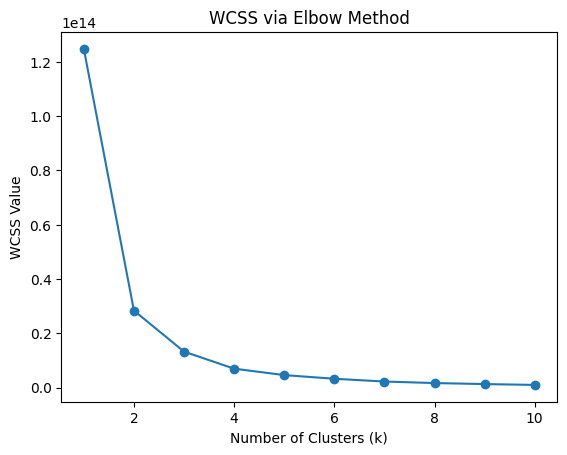


Clustered Data:
    CusID Sex  Age   Income  Rating  Cluster
0  301219   F   32  1902840      26        1
1  301220   M   34   609828       8        0
2  301221   M   47  2361470      43        3
3  301222   M   27  2400870      39        3
4  301223   F   50   365655       9        0


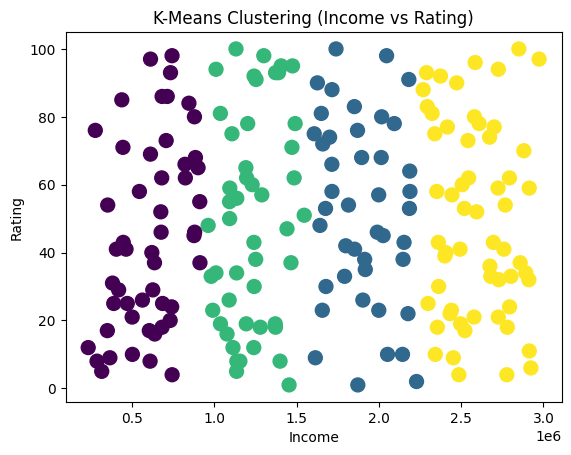

In [ ]:
import pandas as pd
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset (200 rows)
data = {
    "CusID": [301219 + i for i in range(200)],
    "Sex": [random.choice(["M", "F"]) for _ in range(200)],
    "Age": [random.randint(18, 60) for _ in range(200)],
    "Income": [random.randint(200000, 3000000) for _ in range(200)],
    "Rating": [random.randint(1, 100) for _ in range(200)]
}

df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df.head())

# Select features for clustering
X = df[["Age", "Income", "Rating"]]

# -------------------------------
# Elbow Method to find best k
# -------------------------------
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=21, n_init=10)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("WCSS via Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS Value")
plt.show()

# -------------------------------
# Final KMeans clustering (let’s say k=4)
# -------------------------------
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=21, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

print("\nClustered Data:")
print(df.head())

# Visualize final clusters (Income vs Rating)
plt.scatter(df["Income"], df["Rating"], c=df["Cluster"], cmap="viridis", s=100)
plt.xlabel("Income")
plt.ylabel("Rating")
plt.title("K-Means Clustering (Income vs Rating)")
plt.show()


1. Implement K-Means clustering technique on Geyser's Eruptions Segmentation and segregate waiting time
between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park,
Wyoming, USA.


Sample DataFrame:
    eruptions  waiting
0       3.600       79
1       1.800       54
2       3.333       74
3       2.283       62
4       4.533       85
5       2.883       55
6       4.700       88
7       3.600       85
8       1.950       51
9       4.350       85
10      1.833       54
11      3.917       84
12      4.200       78
13      1.750       47
14      4.700       83
15      2.167       52
16      4.800       84
17      1.750       48
18      4.833       83
19      2.500       59


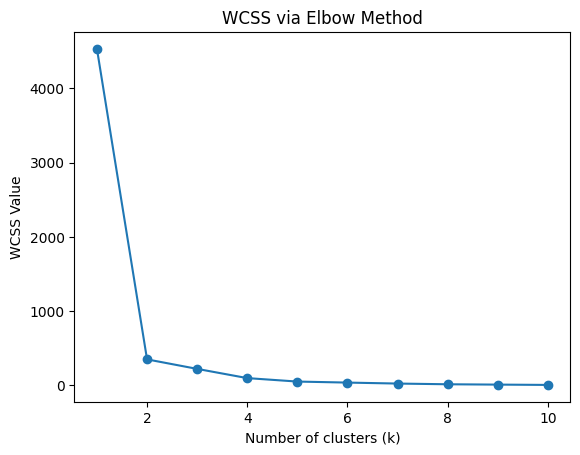


Clustered Data:
    eruptions  waiting  Cluster
0       3.600       79        0
1       1.800       54        1
2       3.333       74        0
3       2.283       62        1
4       4.533       85        0
5       2.883       55        1
6       4.700       88        0
7       3.600       85        0
8       1.950       51        1
9       4.350       85        0
10      1.833       54        1
11      3.917       84        0
12      4.200       78        0
13      1.750       47        1
14      4.700       83        0
15      2.167       52        1
16      4.800       84        0
17      1.750       48        1
18      4.833       83        0
19      2.500       59        1


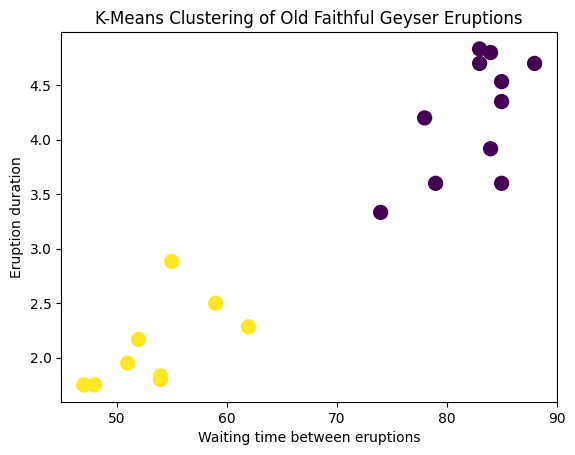

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample Old Faithful dataset (waiting time vs eruption duration)
data = {
    "eruptions": [3.6, 1.8, 3.333, 2.283, 4.533, 2.883, 4.7, 3.6, 1.95, 4.35,
                  1.833, 3.917, 4.2, 1.75, 4.7, 2.167, 4.8, 1.75, 4.833, 2.5],
    "waiting":   [79, 54, 74, 62, 85, 55, 88, 85, 51, 85,
                  54, 84, 78, 47, 83, 52, 84, 48, 83, 59]
}

df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

# Features for clustering
X = df[["eruptions", "waiting"]]

# Elbow Method to find optimal k
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("WCSS via Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS Value")
plt.show()

# Apply K-Means (choose k=2 based on elbow)
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

print("\nClustered Data:")
print(df)

# Visualize clusters
plt.scatter(df["waiting"], df["eruptions"], c=df["Cluster"], cmap="viridis", s=100)
plt.xlabel("Waiting time between eruptions")
plt.ylabel("Eruption duration")
plt.title("K-Means Clustering of Old Faithful Geyser Eruptions")
plt.show()


2. Using K-Means clustering compress any image of size 396 x 396 x 3.

---



Original Image shape: (396, 396, 3)


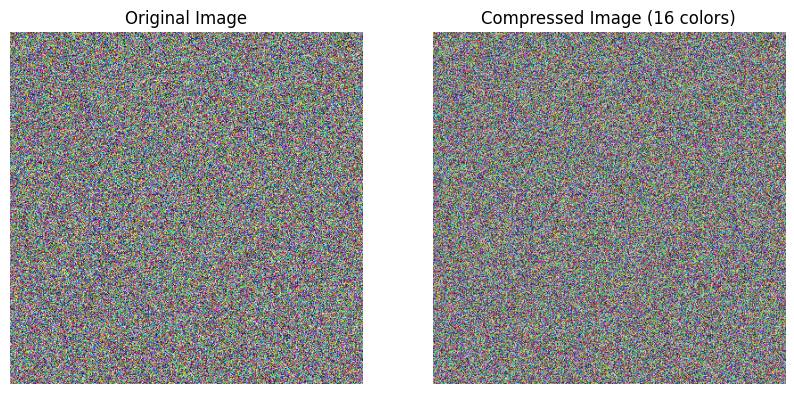

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.transform import resize

# -------------------------------
# Load image (396x396x3)
# -------------------------------
# Replace 'your_image.png' with your image path
# For demonstration, I will create a dummy image of the specified size
# You can replace this with imread('/content/drive/MyDrive/your_image.jpg')
# and resize it if needed: image = resize(image, (396, 396))
image = np.random.randint(0, 256, size=(396, 396, 3), dtype=np.uint8) # Dummy image
# image = imread("/content/drive/MyDrive/133831335597086762.jpg") # Uncomment and replace with your image path
# image = resize(image, (396, 396)) # Uncomment if you load your own image and need to resize

print("Original Image shape:", image.shape)

# Reshape image to (num_pixels, 3)
pixels = image.reshape(-1, 3)

# -------------------------------
# Apply K-Means clustering
# -------------------------------
k = 16  # number of colors
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)
new_colors = kmeans.cluster_centers_[kmeans.labels_]

# Reshape back to original image shape
compressed_image = new_colors.reshape(image.shape).astype(np.uint8)

# -------------------------------
# Visualize original and compressed image
# -------------------------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Compressed Image ({k} colors)")
plt.axis('off')

plt.show()